In [1]:
import numpy as np
import matplotlib.pyplot as plt

from Signal import generateSinWave, generateSquareWave

In [ ]:
samplingF = 75000
duration = 1
n = 2048

# Составляющие сигнала {freq: amp}
freqParts = {
  500: 1,
  1000: 5,
  2000: 3,
  5000: 7,
  7000: 3,
  9000: 2,
  12000: 1
}

### Генерация входного сигнала

In [6]:
testSignal = np.zeros((n,))

for (f, a) in freqParts.items():
  testSignal += generateSinWave(f, 0.0, a, samplingF, n)

График сигнала

Text(0.5, 0, '$t$, c')

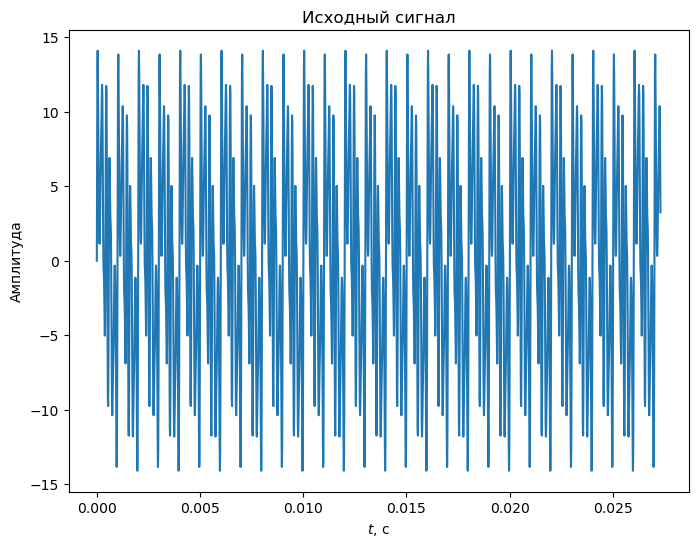

In [ ]:
x = np.linspace(0, 1/samplingF*n, n)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.set_title("Исходный сигнал")
ax.set_ylabel("Амплитуда")
ax.set_xlabel(r"$t$, c")

ax.plot(x, testSignal)